In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import re
from pprint import pprint
from pandas.tseries.offsets import DateOffset
from functools import reduce
from itertools import chain
# plt.style.use('bmh')

Error: Jupyter cannot be started. Error attempting to locate jupyter: 'Kernelspec' module not installed in the selected interpreter (C:\Users\isaac\AppData\Local\Programs\Python\Python39\python.exe).
 Please re-install or update 'jupyter'.

In [ ]:
hello = "hello"
print(hello)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 'Kernelspec' module not installed in the selected interpreter (C:\Users\isaac\AppData\Local\Programs\Python\Python39\python.exe).
 Please re-install or update 'jupyter'.

In [2]:
rname = "useratings_"
usnames = [f"{rname}p{c}.json" for c in range(1,4)]

In [3]:
alldata = pd.concat([pd.read_json(Path(usnames[x])) for x in range(len(usnames))], ignore_index=True)

In [4]:
p = re.compile(r"^\d{1,2}$")
data = alldata.loc[alldata["username"].astype(str).str.match(p)]

In [5]:
data.reset_index(drop=True, inplace=True)

In [6]:
mapping={"1":"Thanh",
"2":"Ghafar",
"3":"Saeed",
"4":"Carol",
"5":"Peter",
"6":"Kitty",
"7":"Harry",
"8":"Michael",
"9":"Melvine",
"10":"Ahmed",
"11":"Godfrey",
"12":"Idriss",
"13":"Phillippe",
"14":"Sayima",
"15":"Emmanuel",
"16":"Edith",
"17":"Francis",
"18":"Frederika",
"19":"Suhbaa",
"20":"Mansi",
"21":"Aditya",
"22":"Eberechukwu",
"23":"Mir Ikramul",
"24":"Janine James",
"25":"Miriam",
"26":"Rozenn"}

In [7]:
data = data.assign(username=data.username.astype(str).convert_dtypes(), \
                   task0 = data.task0.astype(str).convert_dtypes(), \
                   task1 = data.task1.astype(str).convert_dtypes(), \
                   task2 = data.task2.astype(str).convert_dtypes(), \
                   task3 = data.task3.astype(str).convert_dtypes(), \
                   password = data.password.astype(str).convert_dtypes())
data = data.assign(fn=data.username.map(mapping))

In [8]:
cols = ['_ts', 'fn', 'username', 'task0', 'task1', 'task2', 'task3', 'password', 'Dpc', 'task0NumSubmissions',
       'task1NumSubmissions', 'task2NumSubmissions', 'task3NumSubmissions',
       'task0Rating', 'task1Rating', 'task2Rating', 'task3Rating']
data = data[cols].reset_index(drop=True).copy(deep=True)

In [9]:
data.dtypes

_ts                     int64
fn                     object
username               string
task0                  string
task1                  string
task2                  string
task3                  string
password               string
Dpc                     int64
task0NumSubmissions     int64
task1NumSubmissions     int64
task2NumSubmissions     int64
task3NumSubmissions     int64
task0Rating             int64
task1Rating             int64
task2Rating             int64
task3Rating             int64
dtype: object

# New Processing
## Req: 
- \# submissions >= 8. then submissions == 8 

In [10]:
data.groupby(["username", "_ts"]).first()

fn         task0         task1     task2  \
username _ts                                                         
1        1590016108    Thanh  personalized        normal  standard   
         1590100110    Thanh        normal      standard     linux   
         1590100771    Thanh      standard  personalized     linux   
         1590183527    Thanh        normal  personalized     linux   
         1590272307    Thanh        normal  personalized  standard   
...                      ...           ...           ...       ...   
9        1590458473  Melvine        normal         linux  standard   
         1590626719  Melvine        normal  personalized  standard   
         1590727959  Melvine        normal  personalized  standard   
         1590806408  Melvine        normal  personalized     linux   
         1594753740  Melvine      standard        normal     linux   

                            task3  password  Dpc  task0NumSubmissions  \
username _ts                                                            
1        1590016108         linux  jillie02  126                    2   
         1590100110  personalized  jillie02   77                    2   
         1590100771        normal  jillie02   63                    2   
         1590183527      standard  jillie02   82                    2   
         1590272307         linux  jillie02   82                    3   
...                           ...       ...  ...                  ...   
9        1590458473  personalized  jillie02   73                    2   
         1590626719         linux  jillie02   91                    2   
         1590727959         linux  jillie02   68                    2   
         1590806408      standard  jillie02   73                    2   
         1594753740  personalized  jillie02   69                    2   

                     task1NumSubmissions  task2NumSubmissions  \
username _ts                                                    
1        1590016108                    2                    2   
         1590100110                    2                    2   
         1590100771                    3                    2   
         1590183527                    3                    2   
         1590272307                    3                    2   
...                                  ...                  ...   
9        1590458473                    2                    2   
         1590626719                    2                    2   
         1590727959                    2                    2   
         1590806408                    2                    2   
         1594753740                    2                    2   

                     task3NumSubmissions  task0Rating  task1Rating  \
username _ts                                                         
1        1590016108                    2            6            6   
         1590100110                    3            6            5   
         1590100771                    2            6            7   
         1590183527                    2            6            6   
         1590272307                    2            6            7   
...                                  ...          ...          ...   
9        1590458473                    2            7            3   
         1590626719                    2            6            4   
         1590727959                    2            7            6   
         1590806408                    2            6            6   
         1594753740                    2            5            6   

                     task2Rating  task3Rating  
username _ts                                   
1        1590016108            4            3  
         1590100110            3            7  
         1590100771            2            6  
         1590183527            3            3  
         1590272307            4            2  
...                          ...          ...  
9        1590458473     

In [11]:
data = data.groupby(["fn"]).filter(lambda x: x['_ts'].count() >= 8)

In [12]:
completed_status = data.groupby('fn').count()['_ts']
completed_so_far = len(data.groupby("fn").count()["_ts"])
print("Completed so far: \n---------------\n", completed_status, "\n---------------\nTotal people: ", completed_so_far)

Completed so far: 
---------------
 fn
Aditya         11
Ahmed          11
Carol          16
Eberechukwu    14
Edith          10
Francis        13
Frederika      10
Ghafar         12
Harry          15
Idriss         13
Kitty          14
Mansi           8
Melvine        10
Michael        12
Miriam         10
Peter          16
Rozenn         11
Saeed          12
Sayima         12
Suhbaa         10
Thanh          12
Name: _ts, dtype: int64 
---------------
Total people:  21


In [13]:
# Sampling 8 submissions for each person
n = 8
df = data.groupby("fn").apply(lambda x: x.sample(n=n, random_state=42))

In [14]:
number_of_data_points = len(df)

In [15]:
df

_ts      fn username         task0         task1  \
fn                                                                    
Aditya 155  1590705756  Aditya       21        normal  personalized   
       51   1590276781  Aditya       21  personalized        normal   
       221  1591028530  Aditya       21        normal         linux   
       234  1591136628  Aditya       21         linux      standard   
       85   1590429479  Aditya       21        normal  personalized   
...                ...     ...      ...           ...           ...   
Thanh  132  1590620063   Thanh        1         linux      standard   
       72   1590357240   Thanh        1         linux        normal   
       14   1590100771   Thanh        1      standard  personalized   
       13   1590100110   Thanh        1        normal      standard   
       197  1590894114   Thanh        1        normal         linux   

                   task2         task3  password  Dpc  task0NumSubmissions  \
fn                                                                           
Aditya 155         linux      standard  jillie02   72                    2   
       51          linux      standard  jillie02   86                    3   
       221  personalized      standard  jillie02   61                    2   
       234  personalized        normal  jillie02   70                    2   
       85       standard         linux  jillie02   80                    3   
...                  ...           ...       ...  ...                  ...   
Thanh  132  personalized        normal  jillie02   12                    2   
       72       standard  personalized  jillie02   57                    2   
       14          linux        normal  jillie02   63                    2   
       13          linux  personalized  jillie02   77                    2   
       197      standard  personalized  jillie02   68                    2   

            task1NumSubmissions  task2NumSubmissions  task3NumSubmissions  \
fn                                                                          
Aditya 155                    2                    2                    2   
       51                     2                    2                    2   
       221                    2                    2                    2   
       234                    2                    2                    2   
       85                     2                    2                    2   
...                         ...                  ...                  ...   
Thanh  132                    2                    2                    2   
       72                     2                    2                    2   
       14                     3                    2                    2   
       13                     2                    2                    3   
       197                    2                    2                    2   

            task0Rating  task1Rating  task2Rating  task3Rating  
fn                                                              
Aditya 155            4            4            3            4  
       51             6            5            3            6  
       221            4            3            4            4  
       234            4            4            4            4  
       85             5            5            5            3  
...                 ...          ...          ...          ...  
Thanh  132            2            3            6            5  
       72             2            5            4            6  
       14             6            7            2            6  
       13             6            5            3            7  
       197            6            2            3            7  

[168 rows x 17 columns]

# Analyses
- Ratings for task types:
    - Stats: Mean, Standard deviation
- Percentage of errors per type:
    - True if submission had an error
    - False if submission did not have an error
    - summarize per type
- Password:
    - errors per password
    - ratings per passwords (descriptive statistics)
- Change of ratings per users

\# We need to investigate the relationship between where the task comes first? like can you predict the rating for a given password if it comes first? too complicated

## Ratings

In [16]:
ttrating = df.loc[:, cols[3:7]+cols[13:]]

In [17]:
task_to_rating_mapping = lambda row: [(row[f'task{x}'],row[f'task{x}Rating']) for x in range(4)]

In [18]:
tasktypes = ["linux", "normal", "personalized", "standard"]

def get_task_to_key(subdf, mapping_function):
    tuple_series = subdf.apply(mapping_function, axis=1).values
    return list(chain.from_iterable(tuple_series))

def get_cols_of_X_given_Y(X,Y, row_by_row, groupbyKeys):
    row_by_row_grouped = row_by_row.groupby(X).agg(lambda groupng: list(groupng)).unstack()[Y]
    nt2row_by_row_dict = dict(zip(groupbyKeys, [row_by_row_grouped[k] for k in groupbyKeys]))
    return pd.DataFrame(nt2row_by_row_dict)

In [19]:
t2rdf = pd.DataFrame(data=get_task_to_key(ttrating,task_to_rating_mapping), columns=["Task", "Rating"])

In [20]:
# t2rdfgroup = t2rdf.groupby("Task").agg(lambda groupng: list(groupng)).unstack()["Rating"]
# tasktypes = ["linux", "normal", "personalized", "standard"]
# nt2rdt = dict(zip(tasktypes, [t2rdfgroup[k] for k in tasktypes]))
# nt2rdf = pd.DataFrame(nt2rdt)
nt2rdf = get_cols_of_X_given_Y(X="Task", Y="Rating", row_by_row=t2rdf, groupbyKeys=tasktypes)

In [21]:
nt2rdf

,linux,normal,personalized,standard
0,3,4,4,4
1,3,5,6,6
2,3,4,4,4
3,4,4,4,4
4,3,5,5,5
...,...,...,...,...
163,2,5,6,3
164,2,5,6,4
165,2,6,7,6
166,3,6,7,5


In [22]:
nt2rdf.describe()

,linux,normal,personalized,standard
count,168.000000,168.000000,168.000000,168.000000
mean,3.809524,5.976190,5.845238,4.940476
std,2.221162,1.152723,1.294799,1.790535
min,1.000000,2.000000,1.000000,1.000000
25%,2.000000,5.000000,5.000000,4.000000
50%,3.000000,6.000000,6.000000,5.000000
75%,6.000000,7.000000,7.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000


In [474]:
nt2rdf.describe().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>linux</th>\n      <th>normal</th>\n      <th>personalized</th>\n      <th>standard</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>168.000000</td>\n      <td>168.000000</td>\n      <td>168.000000</td>\n      <td>168.000000</td>\n    </tr>\n    <tr>\n      <th>mean</th>\n      <td>3.809524</td>\n      <td>5.976190</td>\n      <td>5.845238</td>\n      <td>4.940476</td>\n    </tr>\n    <tr>\n      <th>std</th>\n      <td>2.221162</td>\n      <td>1.152723</td>\n      <td>1.294799</td>\n      <td>1.790535</td>\n    </tr>\n    <tr>\n      <th>min</th>\n      <td>1.000000</td>\n      <td>2.000000</td>\n      <td>1.000000</td>\n      <td>1.000000</td>\n    </tr>\n    <tr>\n      <th>25%</th>\n      <td>2.000000</td>\n      <td>5.000000</td>\n      <td>5.000000</td>\n      <td>4.000000</td>\n    </tr>\n    <tr>\n      <th>50%</th>\n      <td>3.00000

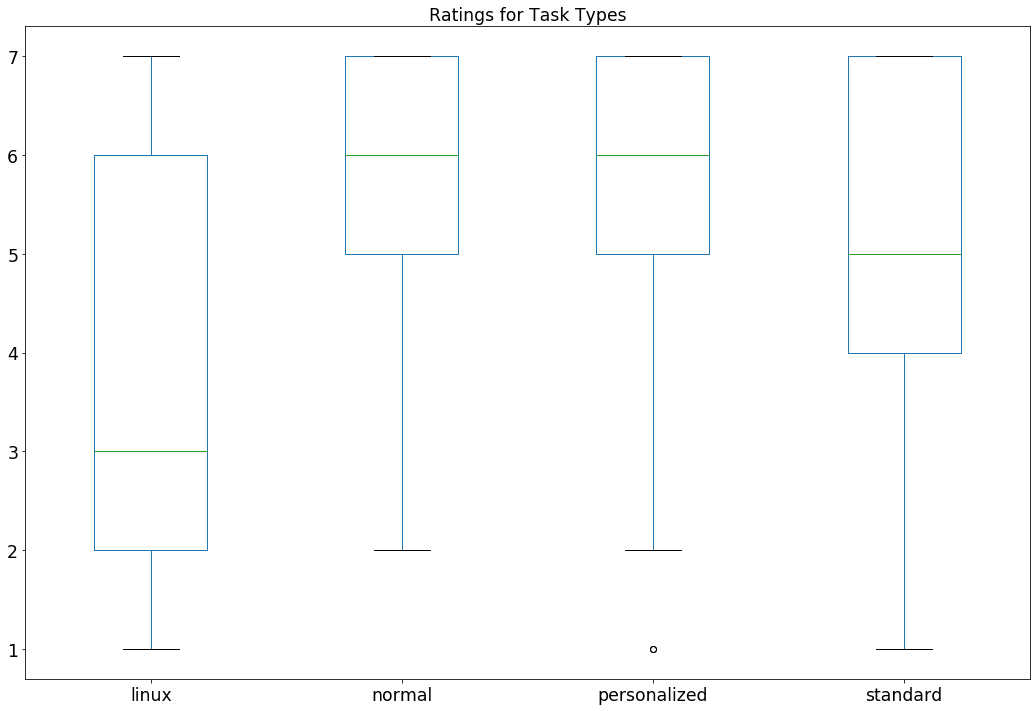

In [475]:
fig, ax = plt.subplots(figsize=(18,12))
nt2rdf.plot.box(ax=ax, fontsize="xx-large")
ax.set_title("Ratings for Task Types", fontsize="xx-large")
plt.savefig("ratings2tasktypes.png")
ax.plot()
plt.show()

## Percentage of errors per type

In [24]:
ttsubs = df.loc[:, cols[3:7]+cols[9:13]]

In [25]:
ttsubs

task0         task1         task2         task3  \
fn                                                                   
Aditya 155        normal  personalized         linux      standard   
       51   personalized        normal         linux      standard   
       221        normal         linux  personalized      standard   
       234         linux      standard  personalized        normal   
       85         normal  personalized      standard         linux   
...                  ...           ...           ...           ...   
Thanh  132         linux      standard  personalized        normal   
       72          linux        normal      standard  personalized   
       14       standard  personalized         linux        normal   
       13         normal      standard         linux  personalized   
       197        normal         linux      standard  personalized   

            task0NumSubmissions  task1NumSubmissions  task2NumSubmissions  \
fn                                                                          
Aditya 155                    2                    2                    2   
       51                     3                    2                    2   
       221                    2                    2                    2   
       234                    2                    2                    2   
       85                     3                    2                    2   
...                         ...                  ...                  ...   
Thanh  132                    2                    2                    2   
       72                     2                    2                    2   
       14                     2                    3                    2   
       13                     2                    2                    2   
       197                    2                    2                    2   

            task3NumSubmissions  
fn                               
Aditya 155                    2  
       51                     2  
       221                    2  
       234                    2  
       85                     2  
...                         ...  
Thanh  132                    2  
       72                     2  
       14                     2  
       13                     3  
       197                    2  

[168 rows x 8 columns]

In [26]:
task_to_subs_mapping = lambda row: [(row[f'task{x}'],row[f'task{x}NumSubmissions']) for x in range(4)]

In [27]:
t2sdf = pd.DataFrame(data=get_task_to_key(ttsubs, task_to_subs_mapping), columns=["Task", "NumSubmissions"])

In [28]:
t2sdf.NumSubmissions.min()

2

In [64]:
t2sdf = t2sdf.assign(NoMistake=lambda x: x.NumSubmissions == 2)

In [65]:
t2sdf

,Task,NumSubmissions,NoMistake
0,normal,2,True
1,personalized,2,True
2,linux,2,True
3,standard,2,True
4,personalized,3,False
...,...,...,...
667,personalized,3,False
668,normal,2,True
669,linux,2,True
670,standard,2,True


In [31]:
# t2sdf.groupby("Task").NoMistake.agg(lambda x: np.unique(x.values, return_counts=True))
nt2sdf = get_cols_of_X_given_Y(X="Task", Y="NoMistake", row_by_row=t2sdf, groupbyKeys=tasktypes)

In [32]:
nt2sdf

,linux,normal,personalized,standard
0,True,True,True,True
1,True,True,False,True
2,True,True,True,True
3,True,True,True,True
4,True,False,True,True
...,...,...,...,...
163,True,True,True,True
164,True,True,True,True
165,True,True,False,True
166,True,True,False,True


In [42]:
nt2sdf.describe() #.loc[("count", "freq"), :]

,linux,normal,personalized,standard
count,168,168,168,168
unique,2,2,2,2
top,True,True,True,True
freq,141,153,151,153


In [476]:
nt2sdf.describe().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>linux</th>\n      <th>normal</th>\n      <th>personalized</th>\n      <th>standard</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>168</td>\n      <td>168</td>\n      <td>168</td>\n      <td>168</td>\n    </tr>\n    <tr>\n      <th>unique</th>\n      <td>2</td>\n      <td>2</td>\n      <td>2</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>top</th>\n      <td>True</td>\n      <td>True</td>\n      <td>True</td>\n      <td>True</td>\n    </tr>\n    <tr>\n      <th>freq</th>\n      <td>141</td>\n      <td>153</td>\n      <td>151</td>\n      <td>153</td>\n    </tr>\n  </tbody>\n</table>'

In [67]:
(168-153)/168

0.08928571428571429

In [104]:
nt3sdf = nt2sdf.apply(lambda cat: np.unique(cat, return_counts=True)) \
      .apply(lambda x: dict(zip(*x))).to_frame() \
      .transpose() \
      .applymap(lambda x: round((x[False]/(x[False]+x[True]))*100,2)) #\
#       .assign(index="% of mistakes") \
#       .set_index("index")

In [105]:
nt3sdf

,linux,normal,personalized,standard
0,16.07,8.93,10.12,8.93


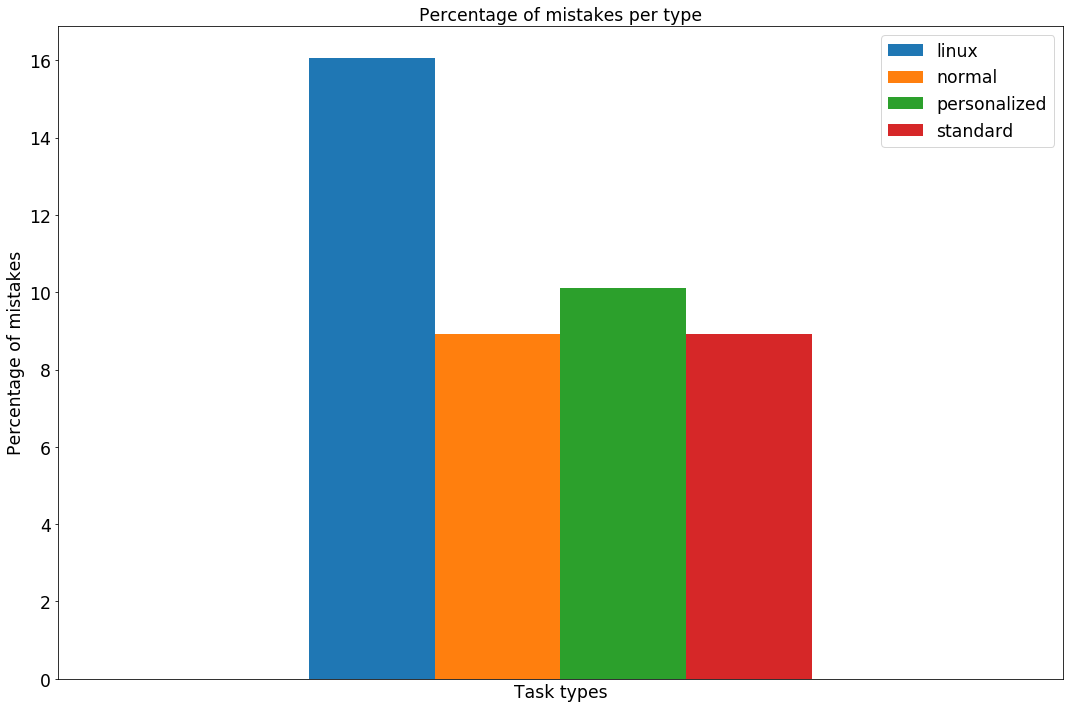

In [477]:
fntsize = 'xx-large'
fig, ax = plt.subplots(figsize=(18,12))
nt3sdf.plot.bar(ax=ax, fontsize=fntsize)
ax.set_title("Percentage of mistakes per type", fontsize=fntsize)
ax.xaxis.set_ticks([])
ax.xaxis.set_label_text("Task types", fontsize=fntsize)
ax.yaxis.set_label_text("Percentage of mistakes", fontsize=fntsize)
ax.legend(fontsize=fntsize)
plt.savefig("Percentage of mistakes per type.png")
ax.plot()
plt.show()

## Per passwords

In [169]:
# ttpass =
# DelayPerCharacter
df.groupby("password").agg({'Dpc': list}).unstack().to_frame().transpose()#.count() # Need to compute anova for this

Dpc  \
password                                           123brian   
0         [84, 56, 66, 47, 55, 62, 51, 73, 67, 49, 109, ...   

                                                             \
password                                           jillie02   
0         [72, 86, 61, 70, 80, 170, 85, 125, 49, 60, 169...   

                                                             \
password                                           lamondre   
0         [153, 55, 52, 70, 55, 39, 42, 46, 134, 131, 18...   

                                                             
password                                           william1  
0         [39, 51, 41, 38, 35, 60, 39, 31, 41, 29, 51, 4...

In [218]:
subs_by_password = df.groupby("password").agg({f"task{x}NumSubmissions": list for x in range(4)})
# subs_by_password = subsbp.agg({f"task{x}NumSubmissions": list for x in range(4)})

In [219]:
subs_by_password = subs_by_password.assign(
    allsubmissions=subs_by_password.task0NumSubmissions \
                   + subs_by_password.task1NumSubmissions \
                   + subs_by_password.task2NumSubmissions \
                   + subs_by_password.task3NumSubmissions
                   )[["allsubmissions"]]

In [220]:
nsbp = subs_by_password.transpose().applymap(lambda x: [v==2 for v in x]).applymap(lambda x: np.unique(x, return_counts=True))

In [221]:
nsbp = nsbp.applymap(lambda x: dict(zip(*x))).applymap(lambda x: round((x[False]/(x[False]+x[True]))*100,2))

In [481]:
nsbp

password,123brian,jillie02,lamondre,william1
allsubmissions,6.25,6.77,18.12,11.61


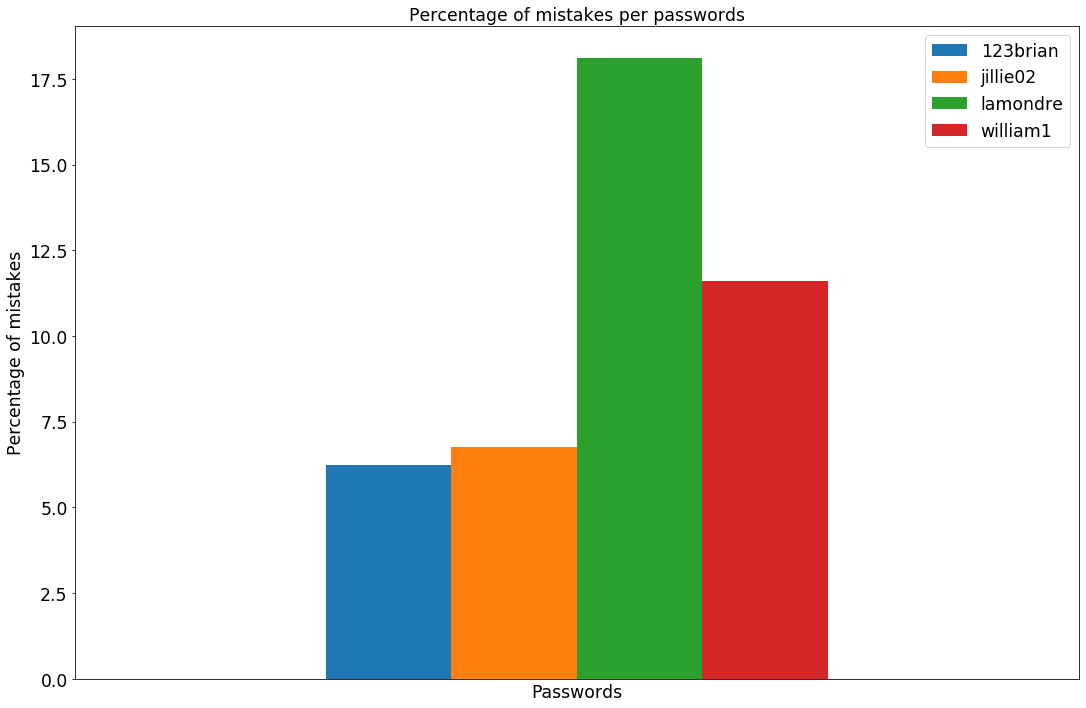

In [478]:
fntsize = 'xx-large'
fig, ax = plt.subplots(figsize=(18,12))
nsbp.plot.box(ax=ax, fontsize=fntsize)
ax.set_title("Percentage of mistakes per passwords", fontsize=fntsize)
ax.xaxis.set_ticks([])
ax.xaxis.set_label_text("Passwords", fontsize=fntsize)
ax.yaxis.set_label_text("Percentage of mistakes", fontsize=fntsize)
ax.legend(fontsize=fntsize)
plt.savefig("Percentage of mistakes per password.png")
ax.plot()
plt.show()

### Ratings per password

In [224]:
rtingsbypasswords = df.groupby("password").agg({f"task{x}Rating": list for x in range(4)})

In [226]:
rtingsbypasswords

,task0Rating,task1Rating,task2Rating,task3Rating
password,,,,
123brian,"[5, 5, 4, 5, 7, 5, 5, 7, 5, 5, 7, 5, 5, 7, 6, ...","[5, 5, 4, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 6, 7, ...","[7, 5, 7, 5, 5, 5, 7, 6, 5, 5, 6, 5, 5, 7, 7, ...","[5, 7, 5, 5, 5, 7, 5, 6, 5, 5, 7, 5, 5, 7, 7, ..."
jillie02,"[4, 6, 4, 4, 5, 5, 4, 4, 7, 7, 3, 1, 3, 5, 4, ...","[4, 5, 3, 4, 5, 5, 4, 3, 1, 6, 3, 6, 1, 4, 5, ...","[3, 3, 4, 4, 5, 3, 3, 4, 3, 3, 4, 6, 5, 1, 2, ...","[4, 6, 4, 4, 3, 5, 4, 4, 7, 1, 4, 2, 6, 6, 5, ..."
lamondre,"[1, 2, 7, 7, 7, 7, 1, 1, 7, 6, 7, 6, 7, 7, 7, ...","[7, 2, 1, 7, 7, 7, 7, 7, 7, 6, 3, 6, 7, 2, 4, ...","[7, 5, 7, 7, 1, 1, 7, 7, 7, 6, 7, 4, 4, 7, 7, ...","[7, 1, 7, 1, 7, 7, 7, 7, 4, 3, 7, 6, 7, 7, 7, ..."
william1,"[7, 7, 5, 5, 6, 6, 5, 4, 6, 6, 5, 5, 4, 5, 6, ...","[3, 7, 4, 3, 7, 7, 5, 3, 4, 4, 2, 5, 1, 4, 4, ...","[6, 5, 6, 4, 1, 2, 5, 6, 4, 6, 7, 6, 5, 5, 7, ...","[4, 2, 6, 5, 3, 4, 4, 7, 5, 4, 5, 4, 5, 4, 2, ..."


In [228]:
rtingsbypasswords = rtingsbypasswords.assign(
    allratings=rtingsbypasswords.task0Rating \
                   + rtingsbypasswords.task1Rating \
                   + rtingsbypasswords.task2Rating \
                   + rtingsbypasswords.task3Rating
                   )[["allratings"]]

In [231]:
rtingsbypasswords = rtingsbypasswords.transpose()

In [252]:
rtingsbypasswords.apply(lambda x: pd.Series(x.values[0])).describe()

password,123brian,jillie02,lamondre,william1
count,96.000000,192.000000,160.00000,224.000000
mean,5.687500,4.234375,5.43125,5.482143
std,1.332291,1.722128,2.10008,1.776691
min,1.000000,1.000000,1.00000,1.000000
25%,5.000000,3.000000,4.00000,5.000000
50%,5.000000,4.000000,7.00000,6.000000
75%,7.000000,6.000000,7.00000,7.000000
max,7.000000,7.000000,7.00000,7.000000


In [479]:
rtingsbypasswords.apply(lambda x: pd.Series(x.values[0])).describe().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>password</th>\n      <th>123brian</th>\n      <th>jillie02</th>\n      <th>lamondre</th>\n      <th>william1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>96.000000</td>\n      <td>192.000000</td>\n      <td>160.00000</td>\n      <td>224.000000</td>\n    </tr>\n    <tr>\n      <th>mean</th>\n      <td>5.687500</td>\n      <td>4.234375</td>\n      <td>5.43125</td>\n      <td>5.482143</td>\n    </tr>\n    <tr>\n      <th>std</th>\n      <td>1.332291</td>\n      <td>1.722128</td>\n      <td>2.10008</td>\n      <td>1.776691</td>\n    </tr>\n    <tr>\n      <th>min</th>\n      <td>1.000000</td>\n      <td>1.000000</td>\n      <td>1.00000</td>\n      <td>1.000000</td>\n    </tr>\n    <tr>\n      <th>25%</th>\n      <td>5.000000</td>\n      <td>3.000000</td>\n      <td>4.00000</td>\n      <td>5.000000</td>\n    </tr>\n    <tr>\n      <th>50%</th>\n      <td>5.00

In [480]:
rtbp2 = rtingsbypasswords.apply(lambda x: pd.Series(x.values[0]))

In [482]:
rtbp2

password,123brian,jillie02,lamondre,william1
0,5.0,4.0,1.0,7
1,5.0,6.0,2.0,7
2,4.0,4.0,7.0,5
3,5.0,4.0,7.0,5
4,7.0,5.0,7.0,6
...,...,...,...,...
219,NaN,NaN,NaN,7
220,NaN,NaN,NaN,7
221,NaN,NaN,NaN,7
222,NaN,NaN,NaN,7


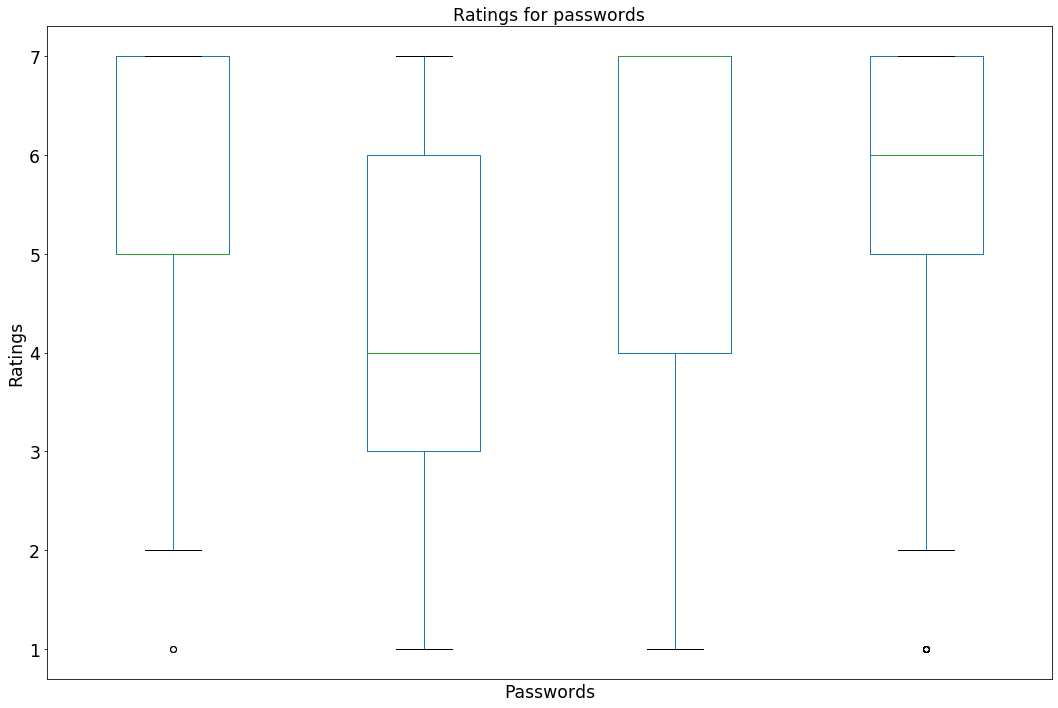

In [484]:
fntsize = 'xx-large'
fig, ax = plt.subplots(figsize=(18,12))
rtbp2.plot.box(ax=ax, fontsize=fntsize)
ax.set_title("Ratings for passwords", fontsize=fntsize)
ax.xaxis.set_ticks([])
ax.xaxis.set_label_text("Passwords", fontsize=fntsize)
ax.yaxis.set_label_text("Ratings", fontsize=fntsize)
# ax.legend(fontsize=fntsize)
# plt.savefig("Percentage of mistakes per password.png")
ax.plot()
plt.show()

## Change of ratings per users

In [289]:
# nmapping = {f'{i}':key for i,key in enumerate([chr(x+64) for x in range(27)])}

In [291]:
# username_to_rounds = df.assign(username=df.username.apply(lambda x: f"Person {nmapping[x]}")).groupby("username").agg(dict(zip([f"task{x}Rating" for x in range(4)], [list for _ in range(4)]))) #

In [392]:
# u2r = username_to_rounds.reset_index(drop=True)
# u2r = u2r.assign(username=list(map(lambda x: f"Person {nmapping[str(x+1)]}", u2r.index.values))).set_index("username")

In [393]:
# u2r

,task0Rating,task1Rating,task2Rating,task3Rating
username,,,,
Person A,"[2, 6, 6, 2, 2, 6, 6, 6]","[6, 2, 6, 3, 5, 7, 5, 2]","[6, 5, 4, 6, 4, 2, 3, 3]","[3, 3, 3, 5, 6, 6, 7, 7]"
Person B,"[6, 6, 5, 6, 6, 6, 6, 5]","[6, 6, 6, 6, 6, 6, 6, 6]","[6, 6, 7, 6, 6, 6, 6, 6]","[6, 6, 7, 6, 6, 6, 6, 6]"
Person C,"[5, 5, 7, 5, 5, 7, 6, 5]","[5, 5, 7, 5, 5, 6, 7, 5]","[5, 5, 6, 5, 5, 7, 7, 5]","[5, 5, 7, 5, 5, 7, 7, 5]"
Person D,"[1, 2, 7, 7, 7, 7, 1, 1]","[7, 2, 1, 7, 7, 7, 7, 7]","[7, 5, 7, 7, 1, 1, 7, 7]","[7, 1, 7, 1, 7, 7, 7, 7]"
Person E,"[3, 4, 3, 4, 4, 1, 4, 4]","[3, 4, 3, 2, 4, 2, 2, 2]","[1, 1, 1, 1, 1, 4, 4, 1]","[3, 2, 2, 4, 2, 4, 1, 4]"
Person F,"[7, 7, 4, 7, 2, 7, 6, 1]","[5, 3, 4, 4, 4, 3, 2, 1]","[2, 7, 4, 7, 7, 5, 5, 6]","[1, 3, 1, 2, 7, 2, 1, 3]"
Person G,"[5, 5, 4, 5, 7, 5, 5, 7]","[5, 5, 4, 5, 5, 5, 5, 6]","[7, 5, 7, 5, 5, 5, 7, 6]","[5, 7, 5, 5, 5, 7, 5, 6]"
Person H,"[7, 3, 7, 3, 7, 4, 4, 3]","[3, 7, 1, 4, 4, 6, 7, 7]","[5, 4, 5, 5, 3, 7, 6, 4]","[4, 5, 7, 7, 5, 3, 3, 5]"
Person I,"[6, 2, 7, 7, 7, 7, 5, 3]","[6, 6, 3, 4, 6, 4, 6, 4]","[3, 7, 3, 2, 3, 2, 3, 3]","[5, 2, 4, 6, 2, 4, 5, 6]"


In [453]:
# u2rt = u2r.applymap(pd.Series)

In [460]:
# newcols = sorted([y+f"_{n}" for n in range(8) for y in[f"task{x}Rating" for x in range(4)]])

In [461]:
# newcolsdict = {k: [] for k in newcols}

In [466]:
# for row in u2rt.iterrows():
#     person = row[0]
#     all_ratings_list = row[1]
#     for i, rating in enumerate(all_ratings_list):
# #         newcolsdict[f"rating_{i}"] = rating.to_frame()[0].values.tolist())
#         break
#     break

[2, 6, 6, 2, 2, 6, 6, 6]


In [467]:
# u2r.applymap(pd.Series).loc["Person A", "task0Rating"].to_frame()[0].values.tolist()

In [468]:
# u2r.applymap(pd.Series).loc["Person A", "task0Rating"].to_frame() #,"Person A"].to_frame().transpose()

In [469]:
# u2r.assign()

In [470]:
# u2r.transpose().applymap(pd.Series).loc["task0Rating", "Person A"]#.rename() #[["Person A"]]#applymap(len)#.apply(lambda x: pd.Series(x.values[0]))

In [ ]:
# idx = pd.MultiIndex.from_arrays([
#     []
# ])

In [410]:
## other

In [384]:
# u2r = u2r.transpose().stack().to_frame().rename(columns={0: "Ratings"})

In [471]:
# len(u2r)

In [386]:
# u2r = u2r.rename(index={f"task{x}Rating": f"Round {x+1}" for x in range(4)}, level=0)

In [472]:
# u2r

In [473]:
# u2r.index